In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
#Our pixel values are between 0 and 255, 0 being black and 255 being white. 
#This means we have a grayscale image as there are no color channels.
train_images[0,4,27]

3

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

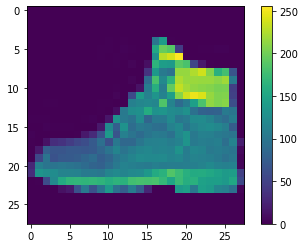

In [7]:
plt.figure()
plt.imshow(train_images[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4951 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3766 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2475 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [12]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
#test accuracy less than train accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8876


In [13]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
preds=[]
for j in range(len(predictions)):
    idx=predictions[j].argmax()
    preds.append(class_names[idx]) #returns index of the element that has max value
preds

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Coat',
 'Sandal',
 'Sandal',
 'Dress',
 'Coat',
 'Trouser',
 'Pullover',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Pullover',
 'Sandal',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Pullover',
 'Shirt',
 'T-shirt/top',
 'Ankle boot',
 'Dress',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'T-shirt/top',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Sneaker',
 'Pullover',
 'Trouser',
 'Pullover',
 'Shirt',
 'Coat',
 'Pullover',
 'Sandal',
 'Bag',
 'Pullover',
 'Pullover',
 'Bag',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sneaker',
 'Bag',
 'Sandal',
 'Trouser',
 'Trouser',
 'Dress',
 'Coat',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/top',
 'Pullover',
 'Shirt',
 'Pullover',
 'Dress',
 'Trouser',
 'Pullover',
 'Bag',
 'Coat',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle boot',
 'Sandal',
 'T-shirt/top',
 'Dress',
 '

Pick a number: 5
1/1 [==============================] - 0s 48ms/step


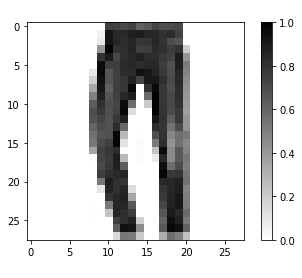

In [15]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.legend
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
        if 0 <= num <= 1000:
            return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
